In [57]:
import tardis
import matplotlib.pyplot as plt
import numpy as np
from tardis.io.atom_data.util import download_atom_data

In [80]:
sim = tardis.run_tardis('./testconfig.yml')

[tardis.model.base   ][WARNING]  Abundances have not been normalized to 1. - normalizing (base.py:440)
[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from ./kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:91)
[tardis.io.atom_data.util][INFO   ]  Atom Data ./kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /home/s4i/Downloads/tardis-data/./kurucz_cd23_chianti_H_He.h5 (util.py:33)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:178)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data, yg_data, two_photon_data (base.py:184)
[tardis.simulation.base][INFO   ]  Starting iteration 1/20 (base.py:324)
[py.warnings         ][WARNING]  /home/s4i/anaconda3/envs/tardis/lib/python3.8/site-packages/astropy/units/equivalencies.py:124: RuntimeWarning: divide by zero encountered in double_scalars
  (si.m, si.Hz, lamb

Running post-merge numba montecarlo (with C close lines)!
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.06649e+43 erg / s Luminosity absorbed = 5.99949e+41 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulation.base][INFO   ]  Iteration converged 4/4 consecutive times. (base.py:226)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w   next_w
	Shell                                               
	0      12797.339184  12741.985433  0.319163  0.32129
	5       9442.126710   9475.038960  0.010291  0.01019

 (base.py:439)
[tardis.simulation.base][INFO   ]  t_inner 12335.328 K -- next t_inner 12293.547 K (base.py:440)
[tardis.simulation.base][INFO   ]  Starting iteration 8/20 (base.py:324)
[py.warnings         ][WARNING]  /home/s4i/anaconda3/envs/tardis/lib/python3.8/site-packages/astropy/units/equivalencies.py:124: RuntimeWarning: divide by zero encountered in double_scalars
  (si.m, si.Hz, lambda x:

Running post-merge numba montecarlo (with C close lines)!
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.05143e+43 erg / s Luminosity absorbed = 6.35008e+41 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:447)
[tardis.simulation.base][INFO   ]  Iteration converged 11/4 consecutive times. (base.py:226)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      12737.545742  12730.466905  0.321854  0.319944
	5       9461.642233   9429.492383  0.010225  0.010238

 (base.py:439)
[tardis.simulation.base][INFO   ]  t_inner 12303.503 K -- next t_inner 12349.317 K (base.py:440)
[tardis.simulation.base][INFO   ]  Starting iteration 15/20 (base.py:324)
[py.warnings         ][WARNING]  /home/s4i/anaconda3/envs/tardis/lib/python3.8/site-packages/astropy/units/equivalencies.py:124: RuntimeWarning: divide by zero encountered in double_scalars
  (si.m, si.Hz, lam

In [81]:
sim.model.velocity

<Quantity [9.50e+08, 1.05e+09, 1.20e+09, 4.00e+09, 5.00e+09, 6.00e+09,
           8.00e+09] cm / s>

Populating the interactive namespace from numpy and matplotlib


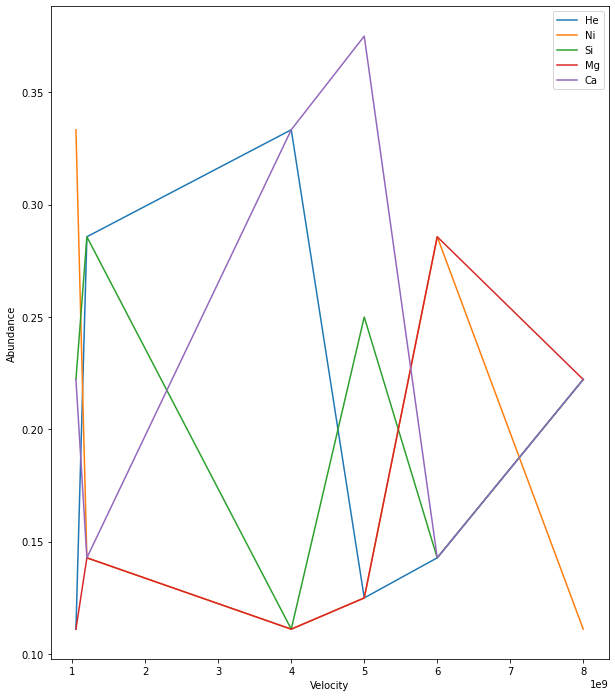

In [87]:
%pylab inline

figure(figsize(10,12))
plot(sim.model.velocity[1:],sim.model.abundance.values.T,label=['He','Ni','Si','Mg','Ca'])
xlabel('Velocity')
ylabel('Abundance')
legend()

In [83]:
sim.model.abundance

,0,1,2,3,4,5
atomic_number,,,,,,
2,0.111111,0.285714,0.333333,0.125,0.142857,0.222222
28,0.333333,0.142857,0.111111,0.125,0.285714,0.111111
14,0.222222,0.285714,0.111111,0.250,0.142857,0.222222
12,0.111111,0.142857,0.111111,0.125,0.285714,0.222222
20,0.222222,0.142857,0.333333,0.375,0.142857,0.222222
